# Lab 3
Domaine fréquenciel

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage import data

## Exercice 1
Sous-échantilloné l'image de sorte à conserver 1 pixel sur 8.
> Et pour 1 pixel sur 16?

In [13]:
img = data.retina().mean(axis=2)
subsampled = img[::8, ::8]

## Exercice 2
Appliqué un filtre gaussian sur les images à l'exercices précédent avec un sigma de 1.
> Utilisé la fonction `gaussian`.  

> Pourquoi est-ce qu'un filtre passe-bas comme le filtre gaussian est mauvais avec, par exemple, des lettres.

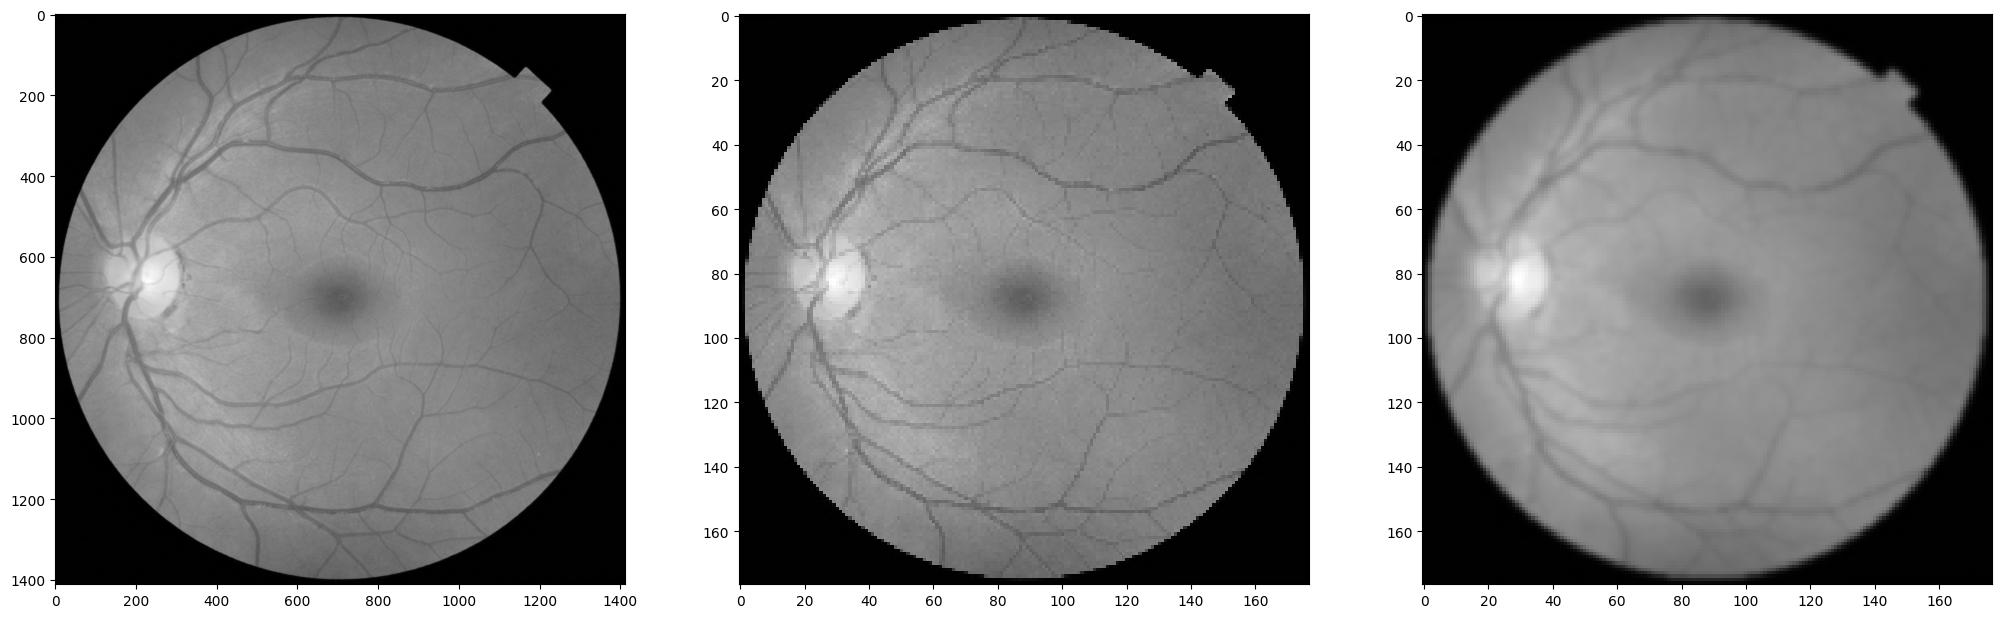

In [17]:
gaussian_subsample = gaussian(subsampled, sigma=1)

_, ax = plt.subplots(1,3, figsize=(25,25))
ax[0].imshow(img, cmap='grey')
ax[1].imshow(subsampled, cmap='grey')
ax[2].imshow(gaussian_subsample, cmap='grey')
plt.show()


## Exercice 3
1. Faite la transformé de Fourier des images suivante et mettez les à nulle (mettre les coins au centre)
2. Faite la transformé de Fourier inverse pour ré-obtenir l'image de base.
> Utilisé les fonctions `np.fft.fft2`, `np.fft.iffshift` et `np.fft.ifft2`

> Comment afficher l'amplitude s'il y a beaucoup de fréquence dans l'image?

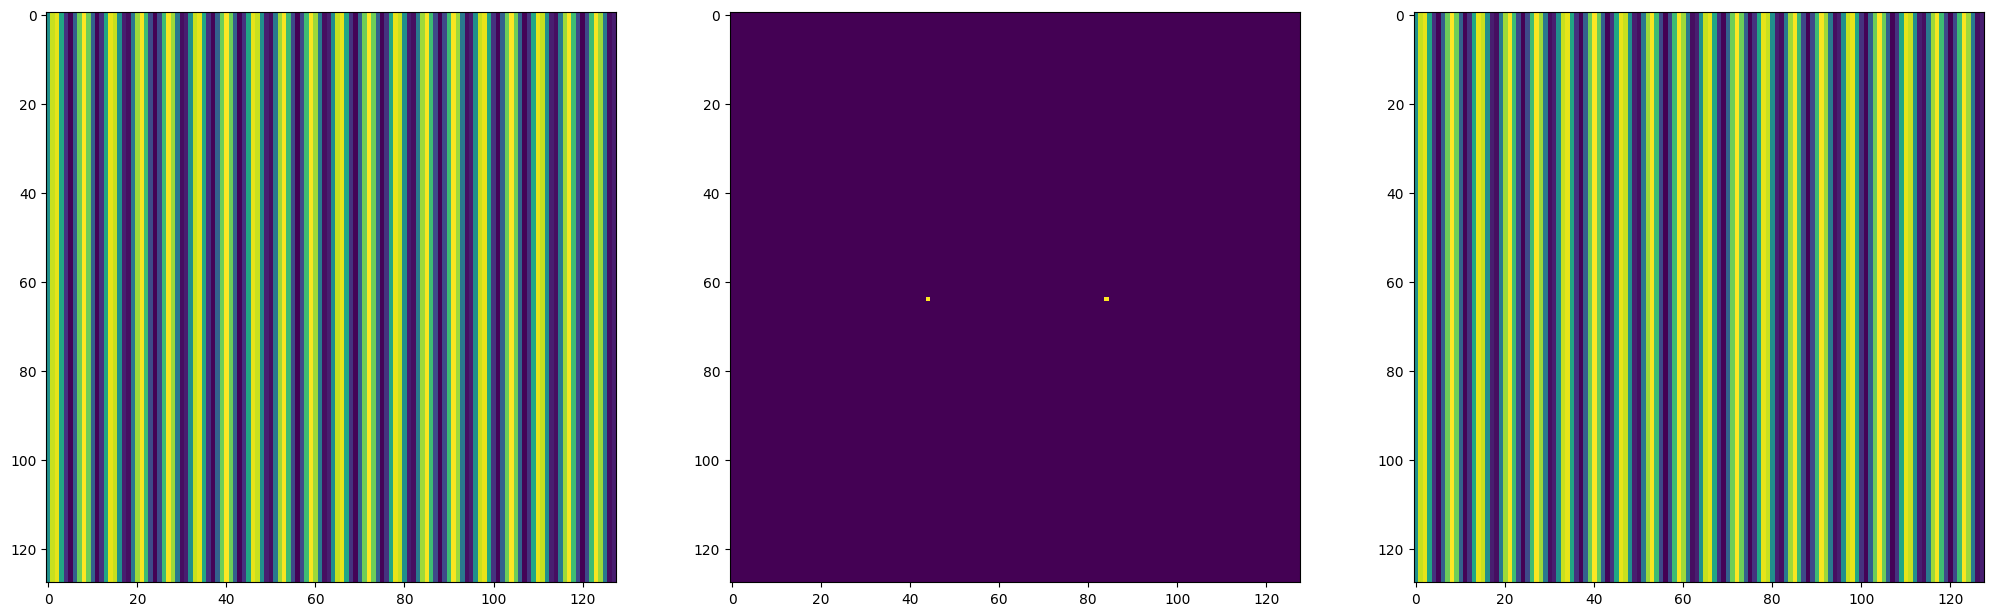

In [45]:
N = 128 # nb pixel
y, x = np.meshgrid(range(N), range(N), indexing="ij")
fx = 2 * np.pi * 20 / N
img = np.sin(x * fx)

_, ax =plt.subplots(1,3, figsize=(25,25))
ax[0].imshow(img)
img_fft = np.fft.fft2(img)
img_fft = np.fft.fftshift(img_fft)
ax[1].imshow( np.abs(img_fft))
img_ifft = np.fft.fftshift(img_fft)
img_ifft = np.fft.ifft2(img_ifft)
ax[2].imshow(img_ifft.real)


plt.show()

## Observations / exemples

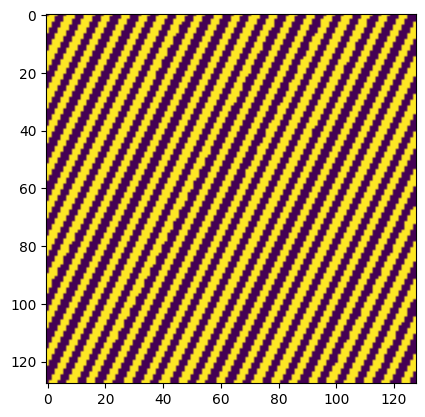

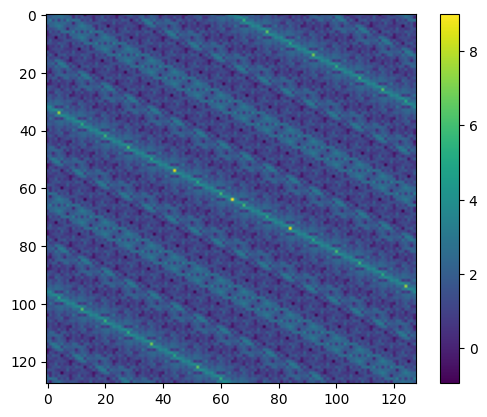

In [49]:
# Exemple onde carrée
N = 128 # nb pixel
y, x = np.meshgrid(range(N), range(N), indexing="ij")
img = np.sin(x * fx + y * fx/2)
img[img>0] = 1
img[img<=0] = 0
plt.imshow(img); plt.show()


# TF
img_fft = np.fft.fft2(img)
img_fft = np.fft.fftshift(img_fft)
plt.imshow(np.log(np.abs(img_fft) + 1e-6)); plt.colorbar()

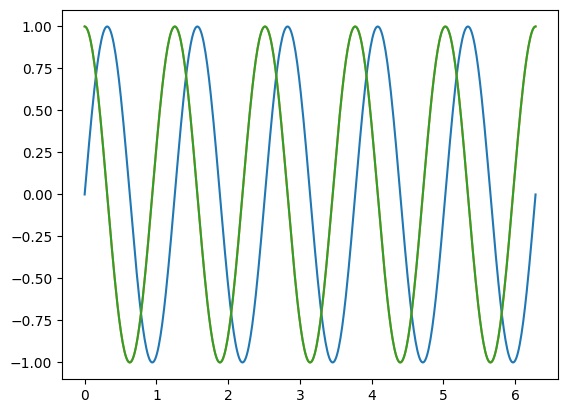

In [51]:
t = np.linspace(0, 2*np.pi, 512)
f = 5
plt.plot(t, np.sin(t * f))
plt.plot(t, np.cos(t * f))
#plt.plot(t, np.sin(t * f + np.pi/2))